# ロジスティック回帰分析

### Import packages

In [1]:
library(ROCR)

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




### import data

In [2]:
data2 <- read.csv("taberepo_image_category2.csv", header = TRUE, fileEncoding = "UTF-8-BOM", skip = 1)
data2

image.category1,image.number,image.category2,feelings,feelings.category,feelings.category2,sex,ages,favorites,favorites.category
<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>
0,0,0,なし,0,なし,0,48,2,0
0,0,0,なし,0,なし,0,46,1,0
0,0,0,なし,0,なし,0,47,3,0
0,0,0,なし,0,なし,0,56,1,0
0,0,0,なし,0,なし,0,48,1,0
0,0,0,なし,0,なし,0,57,1,0
0,0,0,なし,0,なし,0,47,6,0
0,0,0,なし,0,なし,0,52,5,0
0,0,0,なし,0,なし,0,47,3,0


### データの型

In [3]:
data2$favorites.category <- as.factor(data2$favorites.category)
data2$image.category2 <- as.factor(data2$image.category2)
data2$image.number <- as.factor(data2$image.number)
data2$feelings.category <- as.factor(data2$feelings.category)
data2$feelings.category2 <- as.factor(data2$feelings.category2)
data2$sex <- as.factor(data2$sex)

### データの再確認

In [4]:
data2

image.category1,image.number,image.category2,feelings,feelings.category,feelings.category2,sex,ages,favorites,favorites.category
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>
0,0,0,なし,0,なし,0,48,2,0
0,0,0,なし,0,なし,0,46,1,0
0,0,0,なし,0,なし,0,47,3,0
0,0,0,なし,0,なし,0,56,1,0
0,0,0,なし,0,なし,0,48,1,0
0,0,0,なし,0,なし,0,57,1,0
0,0,0,なし,0,なし,0,47,6,0
0,0,0,なし,0,なし,0,52,5,0
0,0,0,なし,0,なし,0,47,3,0


### 一般化線形モデル（ロジスティック回帰分析）

In [5]:
glm.log.2 <- glm(favorites.category ~ sex + ages + feelings.category2 + image.number, 
                 data = data2, family = binomial(link = "logit"))
glm.log2.2 <- step(glm(favorites.category ~ sex + ages + feelings.category2 + image.number, 
                       data = data2, family = binomial(link = "logit")))
glm.model.2 <- summary(glm.log.2)
glm.model.2

Start:  AIC=7327.77
favorites.category ~ sex + ages + feelings.category2 + image.number

                     Df Deviance    AIC
<none>                    7311.8 7327.8
- feelings.category2  2   7406.6 7418.6
- ages                1   7661.1 7675.1
- sex                 1   7761.7 7775.7
- image.number        3   7834.2 7844.2



Call:
glm(formula = favorites.category ~ sex + ages + feelings.category2 + 
    image.number, family = binomial(link = "logit"), data = data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2813  -0.9597  -0.5058   1.0030   3.0020  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.639561   0.742174 -10.293  < 2e-16 ***
sex1                      1.430945   0.070688  20.243  < 2e-16 ***
ages                      0.060644   0.003375  17.969  < 2e-16 ***
feelings.category2正感情  0.658204   0.068977   9.542  < 2e-16 ***
feelings.category2負感情  0.302394   0.167676   1.803   0.0713 .  
image.number1             2.822032   0.721140   3.913 9.10e-05 ***
image.number2             3.586432   0.722255   4.966 6.85e-07 ***
image.number3             4.315654   0.722787   5.971 2.36e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    

### 回帰モデルを用いて予測 & 混同行列の作成

In [6]:
glm.model.predict.2 <- predict(glm.log.2, type = "response")
glm.model.predict2.2 <- ifelse(glm.model.predict.2 >= 0.5, 1, 0)
glm.model.table.2 <- table(glm.model.predict2.2, data2$favorites.category)
glm.model.table.2

                    
glm.model.predict2.2    0    1
                   0 2564 1109
                   1  873 1821

### オッズ比の確認（p値も指数を取られている）

In [7]:
# オッズ比
cat("オッズ比の確認")
exp(coef(glm.model.2))
# p値の確認
cat("p値の確認")
coef(glm.model.2)
# 95%信頼区間の算出
cat("95%信頼区間の算出(0を跨いでいないことを確認)")
exp(confint(glm.log.2))

オッズ比の確認

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),4.810396e-04,2.100497,3.385279e-05,1.000000
sex1,4.182650e+00,1.073246,6.186994e+08,1.000000
ages,1.062521e+00,1.003381,6.367421e+07,1.000000
feelings.category2正感情,1.931320e+00,1.071412,1.393745e+04,1.000000
feelings.category2負感情,1.353094e+00,1.182554,6.070482e+00,1.073924
image.number1,1.681098e+01,2.056776,5.006357e+01,1.000091
image.number2,3.610501e+01,2.059070,1.433954e+02,1.000001
image.number3,7.486256e+01,2.060168,3.918378e+02,1.000000


p値の確認

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-7.63956096,0.742174084,-10.293489,7.539373e-25
sex1,1.43094509,0.070687936,20.243130,4.083897e-91
ages,0.06064397,0.003374867,17.969290,3.390247e-72
feelings.category2正感情,0.65820389,0.068977239,9.542334,1.396527e-21
feelings.category2負感情,0.30239395,0.167676381,1.803438,7.131946e-02
image.number1,2.82203227,0.721139918,3.913294,9.104570e-05
image.number2,3.58643156,0.722254573,4.965606,6.848691e-07
image.number3,4.31565390,0.722787438,5.970848,2.360236e-09


95%信頼区間の算出(0を跨いでいないことを確認)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),7.663707e-05,1.638224e-03
sex1,3.644282e+00,4.808033e+00
ages,1.055553e+00,1.069612e+00
feelings.category2正感情,1.687788e+00,2.211903e+00
feelings.category2負感情,9.726738e-01,1.877987e+00
image.number1,5.228645e+00,1.028327e+02
image.number2,1.119427e+01,2.211525e+02
image.number3,2.317677e+01,4.588511e+02


### Accuracyの算出

In [8]:
glm.model.table.2
cat("Accuracy=")
(2564 + 1821) / (2564 + 1109 + 873 + 1821)

                    
glm.model.predict2.2    0    1
                   0 2564 1109
                   1  873 1821

Accuracy=

[1] 0.6887074

### ROC曲線の描画とAUCの算出

[1] "AUC="
[1] 0.7623634


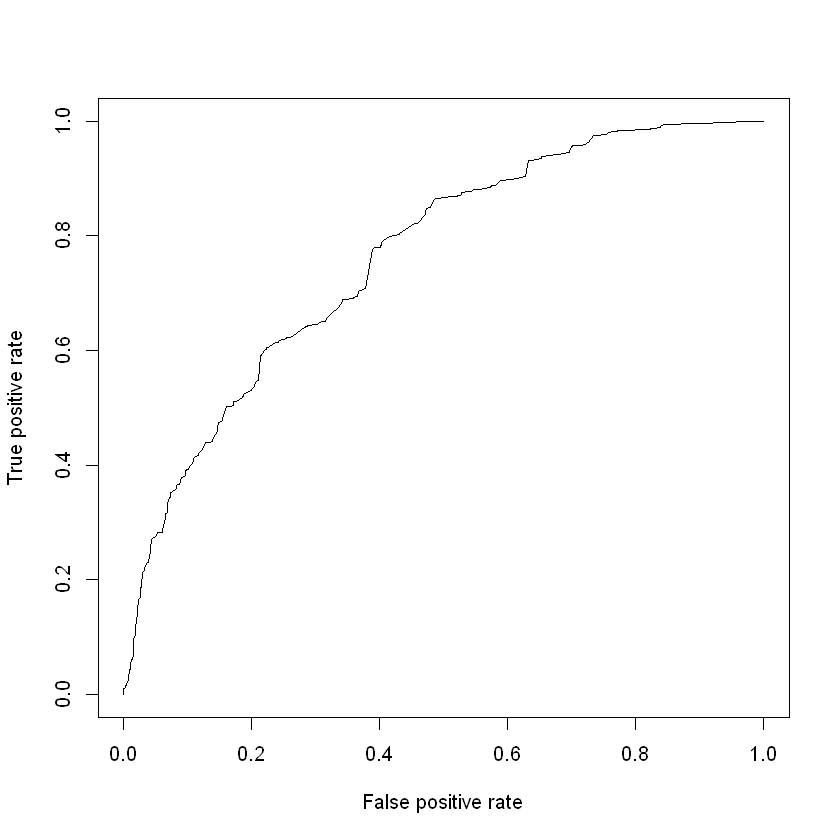

In [9]:
# ROC AUC
pred.2 <- prediction(glm.model.predict.2, data2$favorites.category)
perf.2 <- performance(pred.2, "tpr", "fpr")
plot(perf.2)
auc.tmp.2 <- performance(pred.2,"auc")
auc.2 <- as.numeric(auc.tmp.2@y.values)
print("AUC=")
print(auc.2)